# French data exploration

## Import data and librairies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import regressions as reg
import numpy as np
sns.set_theme(style='white')
energy_table = pd.read_csv('../BDD/energy.csv', sep=';')
energy_table=energy_table[energy_table.Code=='FRA']
gdp_table = pd.read_csv('../BDD/gdp-per-capita-maddison-2020.csv')
gdp_table = gdp_table[gdp_table.Code=='FRA']
gdp_table.drop('Entity', axis=1, inplace=True)
gdp_table.drop('Code', axis=1, inplace=True)
gdp_table.drop('145446-annotations', axis=1, inplace=True)
pop_table = pd.read_csv('../BDD/population.csv', sep=';')
pop_table = pop_table[pop_table.Code=='FRA']
FR_table = pd.merge(gdp_table, pop_table, on=['Year'])
FR_table = pd.merge(FR_table, energy_table, on=['Year'])


FR_table.head()

,Year,GDP per capita,Entity_x,Code_x,"Total population (Gapminder, HYDE & UN)",Entity_y,Code_y,Primary energy consumption (TWh)
0,1820,1809.0,France,FRA,31549988,France,FRA,149.153036
1,1821,1953.0,France,FRA,31700048,France,FRA,150.152854
2,1822,1875.0,France,FRA,31853160,France,FRA,151.152673
3,1823,1934.0,France,FRA,32007456,France,FRA,152.152225
4,1824,1986.0,France,FRA,32163920,France,FRA,153.108943


In [2]:
pop = FR_table['Total population (Gapminder, HYDE & UN)']
gdp = FR_table['GDP per capita']*pop
energy = FR_table['Primary energy consumption (TWh)']*3.6
year = FR_table['Year']
yplot = np.linspace(year.min(), year.max(), 200)

## Data exploration

### Energy

No handles with labels found to put in legend.


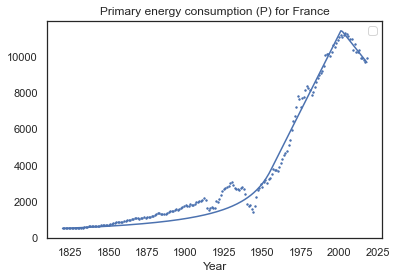

In [3]:
plt.scatter(year, energy, s=2) 
plt.xlabel('Year')
plt.title('Primary energy consumption (P) for France')
b,c,d,f,x1,x2 = 8000, 1985, 150, -85, 1973, 2003
b,c,d,f,x1,x2  = reg.hypLinLin(year, energy/3.6, p0=(b,c,d,f,x1,x2 ), bounds=[-100,23000], maxfev=100000)
plt.plot(yplot, 3.6*reg.hyp_lin_lin(yplot,b,c,d,f,x1,x2 ))
plt.legend()
FR_table['Energy(PJ)-Time(Year)'] =3.6*reg.hyp_lin_lin(year,b,c,d,f,x1,x2 )

### GDP

Text(0, 0.5, '10e12 $')

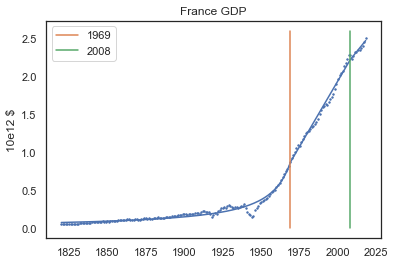

In [4]:
plt.scatter(year, gdp/10**12, s=2)
plt.title('France GDP')
b,c,d,f,x1,x2 = 12, 1983,0.033,0.025,1971,2009
# plt.plot(yplot, reg.hyp_lin_lin(yplot,b,c,d,f,x1,x2 ))
b,c,d,f,x1,x2 = reg.hypLinLin (year, gdp/10**12, p0=(b,c,d,f,x1,x2), bounds = [-2, 2100])
plt.plot(yplot, reg.hyp_lin_lin(yplot,b,c,d,f,x1,x2 ))
plt.plot([x1, x1], [0, 2.6], label=str(int(x1)))
plt.plot([x2, x2], [0, 2.6], label=str(int(x2)))
plt.legend()
plt.ylabel('10e12 $')

In [5]:
ypred= (10**12)*reg.hyp_lin_lin(year,b,c,d,f,x1,x2)
FR_table['GDP(2011$)-Time(year)'] = ypred


### Correlation

(0.232246092312, 0.0220241454876, 9.999725341796875, 0.0026960971508624776, 0.010109597933337747, 0.005079406105911356)
No handles with labels found to put in legend.


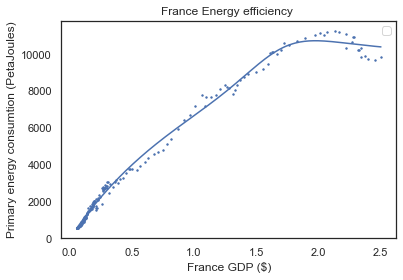

In [6]:
g= gdp/10**12
e = energy/10**5
gplot = np.linspace(g.min(), g.max(), 200)
plt.scatter(g,10**5*e, s= 2)
plt.xlabel('France GDP ($)')
plt.ylabel('Primary energy consumtion (PetaJoules)')
plt.title('France Energy efficiency ')
G_i, E_i, A, a1, a2, a3 = reg.sReg(g,e, bounds= [0,20], maxfev=1000000)
plt.plot(gplot, 10**5*reg.s_model(gplot,G_i, E_i, A, a1, a2, a3 ))
inf_dist = np.array([abs(g[i]-0.3) for i in range(len(g))])
year_infl = year[inf_dist.argmin()]


e_max = reg.s_model(gplot,G_i, E_i, A, a1, a2, a3 ).argmax()
max_dist = np.array([abs(g[i]-gplot[e_max]) for i in range(len(g))])
year_max = year[max_dist.argmin()]
plt.legend()

In [7]:
ypred=  10**5*reg.s_model(g,G_i, E_i, A, a1, a2, a3 )
FR_table['Energy(PJ)-GDP(10e12$)'] = ypred

In [8]:
FR_table.head()

,Year,GDP per capita,Entity_x,Code_x,"Total population (Gapminder, HYDE & UN)",Entity_y,Code_y,Primary energy consumption (TWh),Energy(PJ)-Time(Year),GDP(2011$)-Time(year),Energy(PJ)-GDP(10e12$)
0,1820,1809.0,France,FRA,31549988,France,FRA,149.153036,525.169858,7.769431e+10,540.635708
1,1821,1953.0,France,FRA,31700048,France,FRA,150.152854,528.522096,7.817200e+10,586.485165
2,1822,1875.0,France,FRA,31853160,France,FRA,151.152673,531.917405,7.865561e+10,565.792373
3,1823,1934.0,France,FRA,32007456,France,FRA,152.152225,535.356619,7.914523e+10,586.411639
4,1824,1986.0,France,FRA,32163920,France,FRA,153.108943,538.840597,7.964099e+10,605.074788


No handles with labels found to put in legend.


Text(0.5, 1.0, 'Energy intensity (PetaJoules/$)')

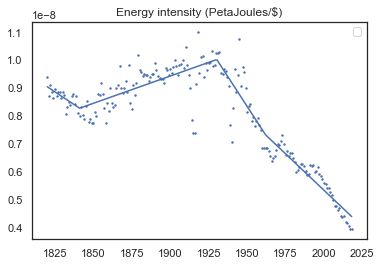

In [9]:
plt.scatter(year, energy/gdp, s=2)
a,b, c, e, g, x1, x2, x3 = -10, 10, 10, -2*10, -1.5*10, 1850, 1925, 1980
a,b, c, e, g, x1, x2, x3 = reg.LLLL(year, energy/gdp*10**8, p0=(a,b, c, e, g, x1, x2, x3) , bounds = [-200,2010])
plt.plot(yplot, 10**-8*reg.llll(yplot,a,b, c, e, g, x1, x2, x3 ))

plt.legend()
plt.title('Energy intensity (PetaJoules/$)')

In [10]:
ypred = reg.llll(year,a,b, c, e, g, x1, x2, x3 )*(10**-8)
FR_table['EI(PJ/$)-Time(year)'] = ypred

In [11]:
FR_table.head()

,Year,GDP per capita,Entity_x,Code_x,"Total population (Gapminder, HYDE & UN)",Entity_y,Code_y,Primary energy consumption (TWh),Energy(PJ)-Time(Year),GDP(2011$)-Time(year),Energy(PJ)-GDP(10e12$),EI(PJ/$)-Time(year)
0,1820,1809.0,France,FRA,31549988,France,FRA,149.153036,525.169858,7.769431e+10,540.635708,9.047330e-09
1,1821,1953.0,France,FRA,31700048,France,FRA,150.152854,528.522096,7.817200e+10,586.485165,9.010803e-09
2,1822,1875.0,France,FRA,31853160,France,FRA,151.152673,531.917405,7.865561e+10,565.792373,8.974275e-09
3,1823,1934.0,France,FRA,32007456,France,FRA,152.152225,535.356619,7.914523e+10,586.411639,8.937747e-09
4,1824,1986.0,France,FRA,32163920,France,FRA,153.108943,538.840597,7.964099e+10,605.074788,8.901220e-09


Text(0.5, 1.0, 'Variation in (%), France')

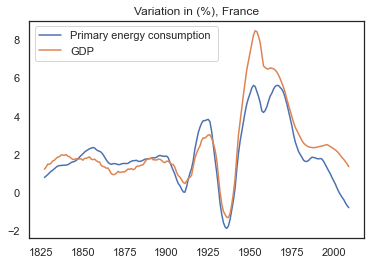

In [12]:
from derivee import growth_rate
x, y=growth_rate(year, energy, s=10, a =15 )
x1,y1 = growth_rate(year, gdp, s=10, a=15)
plt.plot(x,y, label = "Primary energy consumption ")
plt.plot(x1, y1, label = "GDP" )
plt.legend()
plt.title("Variation in (%), France")


In [15]:
FR_table =FR_table.rename(columns={'Code_x':'Code', 'Entity_x':'Entity', 'Energy (PetaJoules)':'Primary energy (PJ)', 'Primary energy consumption (TWh)':'Primary energy (TWh)','Total population (Gapminder, HYDE & UN)' : 'Population' })
FR_table['Primary energy (PJ)']=energy
FR_table.head()

,Year,GDP per capita,Entity,Code,Population,Entity_y,Code_y,Primary energy (TWh),Energy(PJ)-Time(Year),GDP(2011$)-Time(year),Energy(PJ)-GDP(10e12$),EI(PJ/$)-Time(year),Primary energy (PJ)
0,1820,1809.0,France,FRA,31549988,France,FRA,149.153036,525.169858,7.769431e+10,540.635708,9.047330e-09,536.950930
1,1821,1953.0,France,FRA,31700048,France,FRA,150.152854,528.522096,7.817200e+10,586.485165,9.010803e-09,540.550276
2,1822,1875.0,France,FRA,31853160,France,FRA,151.152673,531.917405,7.865561e+10,565.792373,8.974275e-09,544.149621
3,1823,1934.0,France,FRA,32007456,France,FRA,152.152225,535.356619,7.914523e+10,586.411639,8.937747e-09,547.748009
4,1824,1986.0,France,FRA,32163920,France,FRA,153.108943,538.840597,7.964099e+10,605.074788,8.901220e-09,551.192194


In [16]:
FR_table.to_csv('../BDD/final_tables/FRA.csv', index=False)